**Importing Required Libraries**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from scipy import stats

**Gathering and Observing Data**

In [22]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
dataset.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [23]:
dataset.shape

(34857, 21)

In [24]:
num_columns = dataset.shape[1]
print("Number of Columns:", num_columns)

print("Size of Dataset:", dataset.size)

Number of Columns: 21
Size of Dataset: 731997


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [26]:
str_columns = ["Suburb", "Address", "Type", "Method", "SellerG", "Date", "CouncilArea", "Regionname"]
int_columns = ["Rooms", "Price", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Propertycount"]

In [27]:
dataset = dataset.drop_duplicates()

dataset.duplicated().any()

False

In [28]:
for column in str_columns:
  dataset[column] = dataset[column].fillna(dataset[column].mode().loc[0])

for column in int_columns:
  dataset[column] = dataset[column].fillna(dataset[column].mode().loc[0])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  int64  
 3   Type           34856 non-null  object 
 4   Price          34856 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       34856 non-null  float64
 11  Bathroom       34856 non-null  float64
 12  Car            34856 non-null  float64
 13  Landsize       34856 non-null  float64
 14  BuildingArea   34856 non-null  float64
 15  YearBuilt      34856 non-null  float64
 16  CouncilArea    34856 non-null  object 
 17  Lattitude      34856 non-null  float64
 18  Longti

In [29]:
z_scores_landsize = np.abs(stats.zscore(dataset['Landsize']))
z_scores_buildingarea = np.abs(stats.zscore(dataset['BuildingArea']))
threshold = 3

outliers_landsize = np.where(z_scores_landsize > threshold)
outliers_buildingarea = np.where(z_scores_buildingarea > threshold)

outliers_indices = set(outliers_landsize[0]) | set(outliers_buildingarea[0])

dataset = dataset.drop(index=list(outliers_indices))

dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,120.0,1970.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,120.0,1970.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,600000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,120.0,1970.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,120.0,1970.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,1.0,2.0,0.0,120.0,1970.0,Maribyrnong City Council,-37.83610,144.99660,Western Metropolitan,6543.0


**Data Visualization**

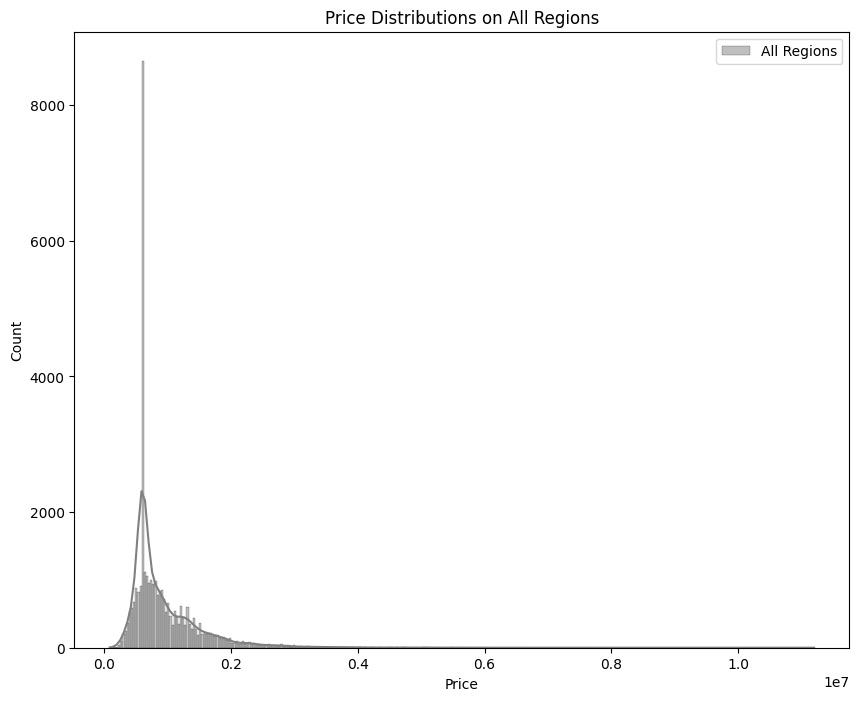

In [30]:
plt.figure(figsize=(10, 8))
sns.histplot(dataset['Price'], kde=True, color='gray', label='All Regions')
plt.title('Price Distributions on All Regions')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()
plt.show()

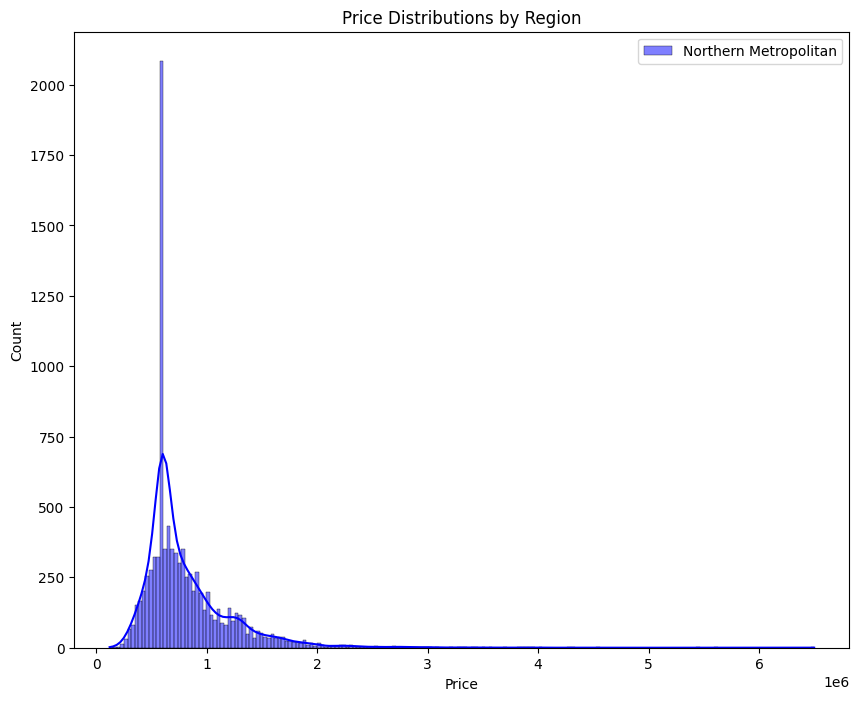

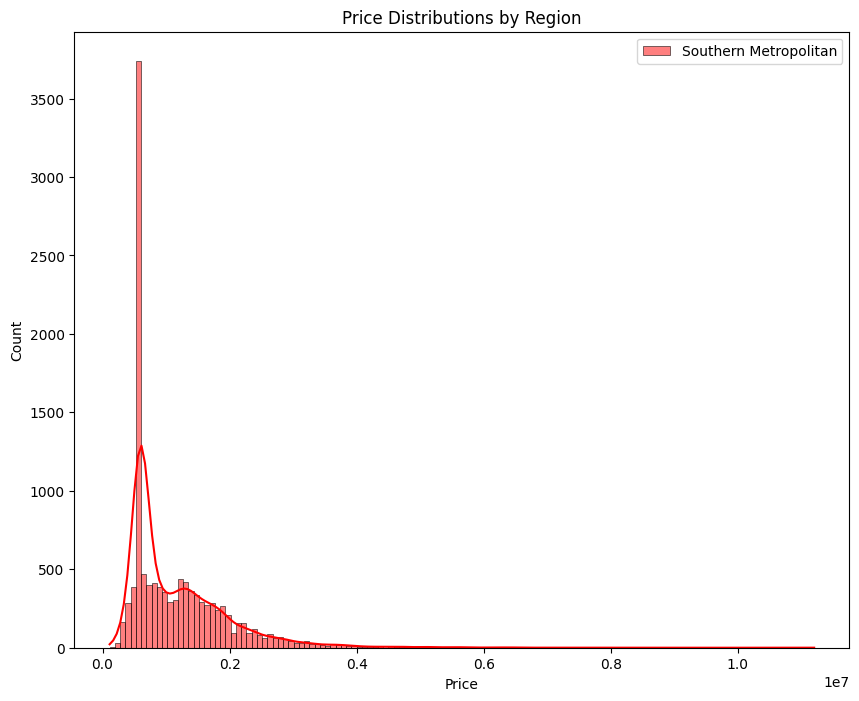

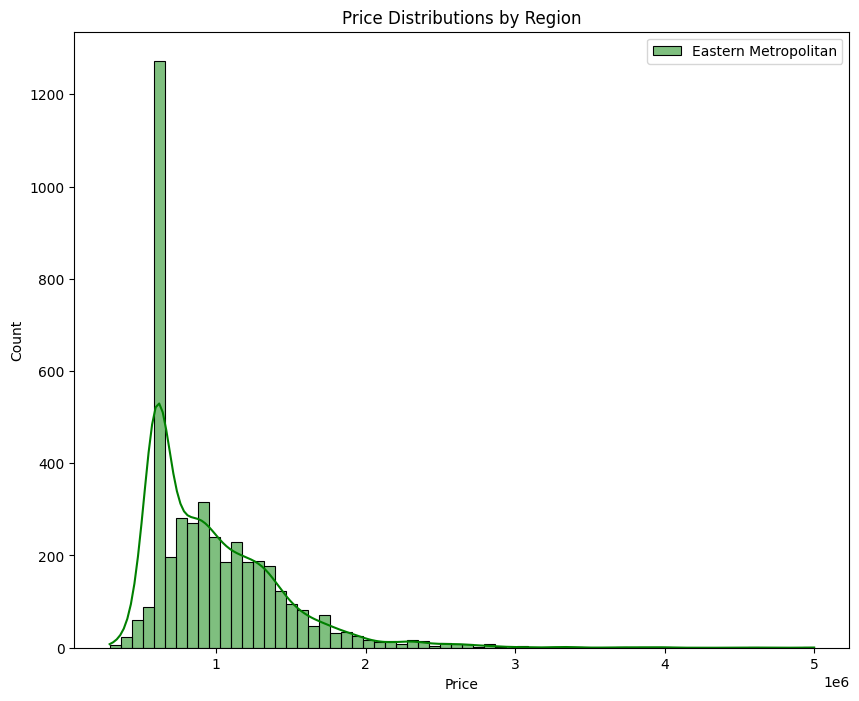

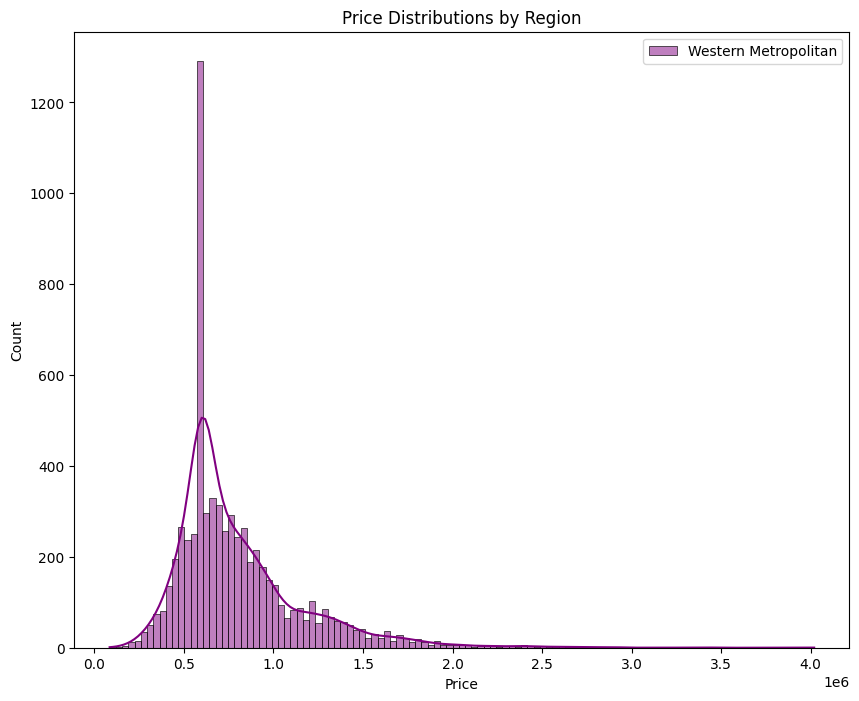

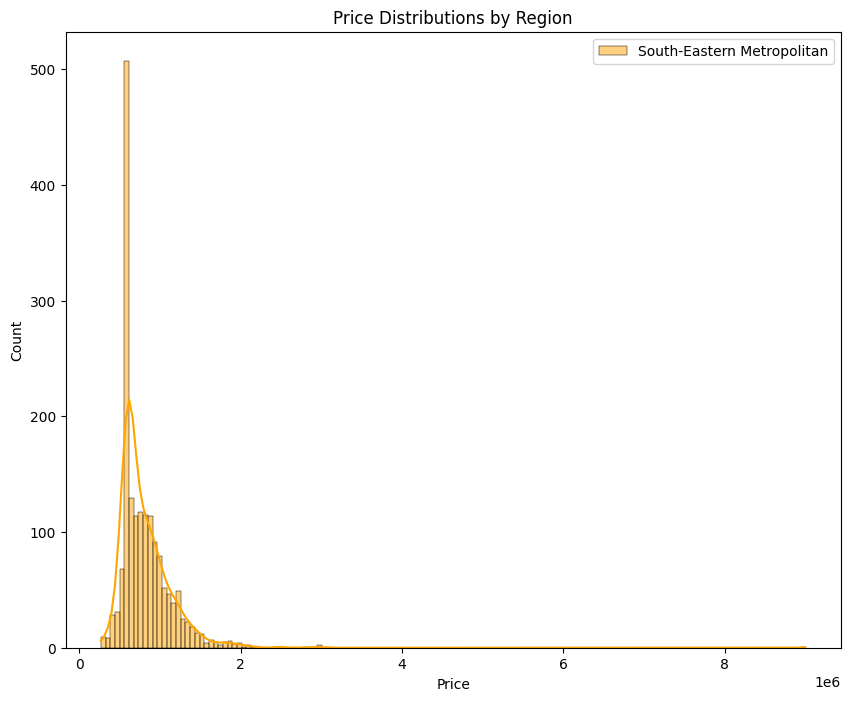

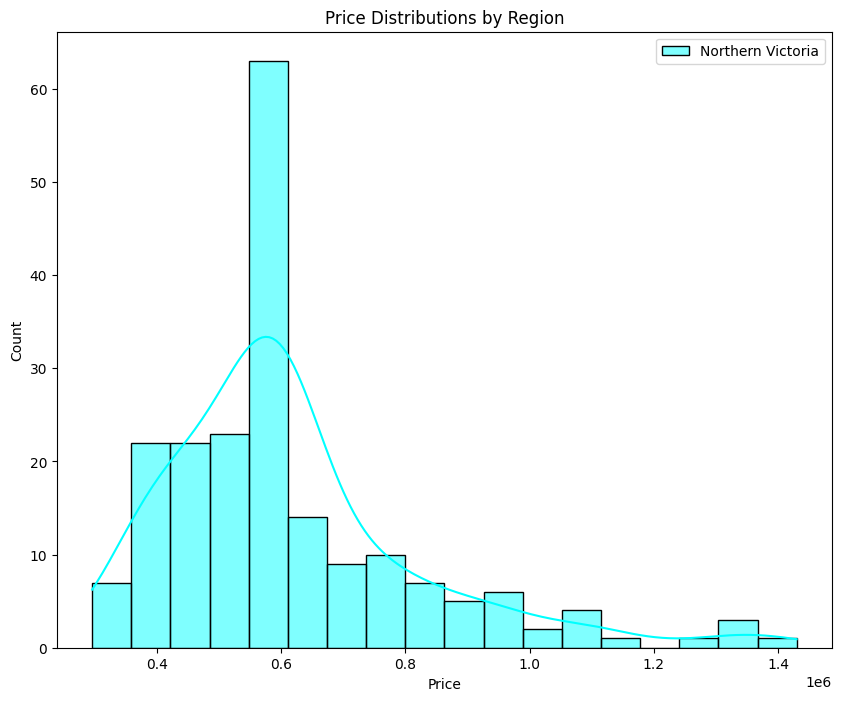

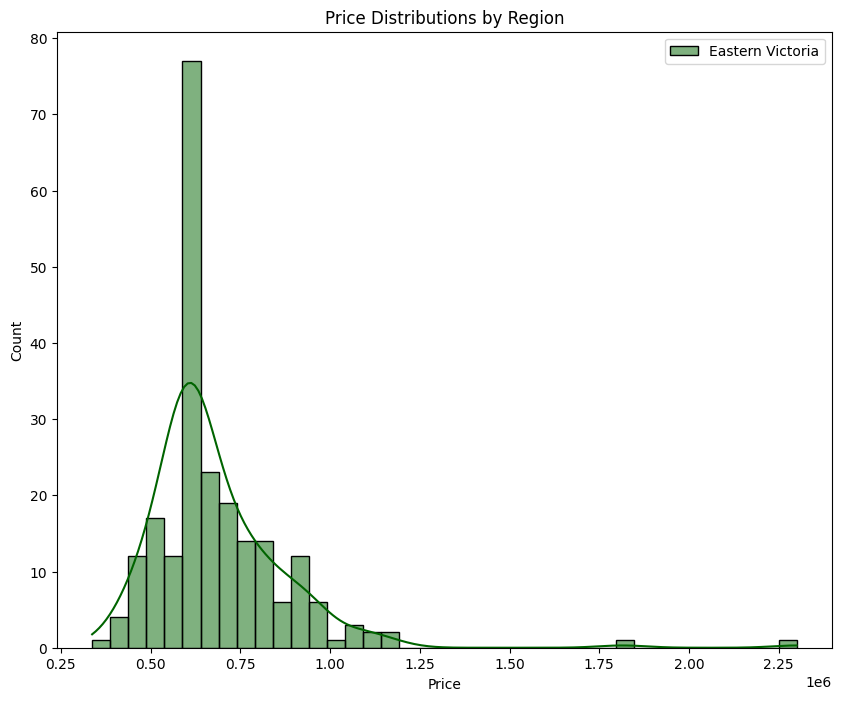

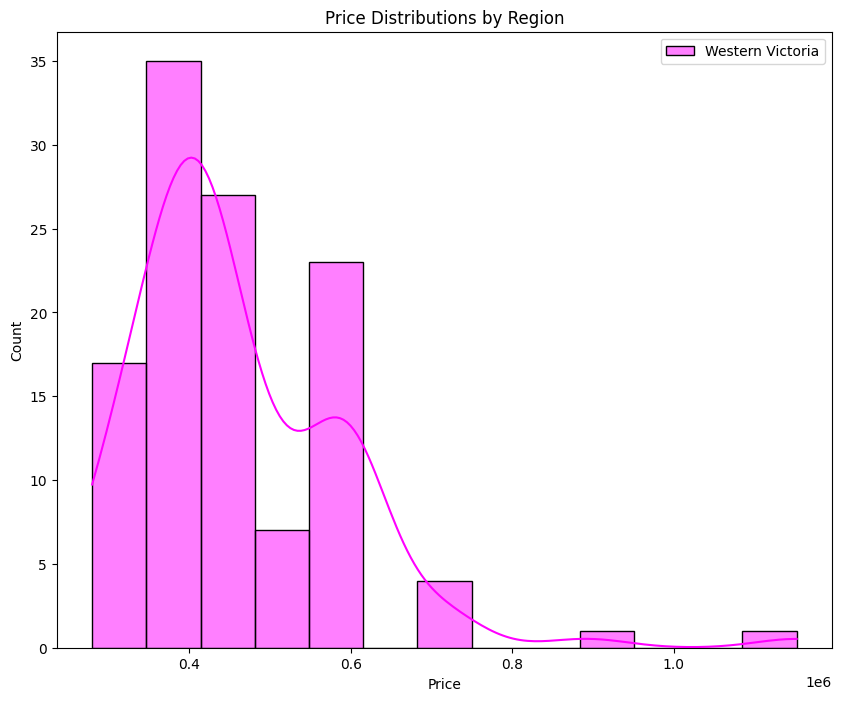

In [31]:
regions = ['Northern Metropolitan', 'Southern Metropolitan', 'Eastern Metropolitan', 'Western Metropolitan', 'South-Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria']
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'darkgreen', 'magenta']

all_regions = dataset['Price']

for region, color in zip(regions, colors):
  plt.figure(figsize=(10, 8))
  region_data = dataset[dataset['Regionname'] == region]['Price']
  sns.histplot(region_data, kde=True, color=color, label=region)
  plt.title('Price Distributions by Region')
  plt.xlabel('Price')
  plt.ylabel('Count')
  plt.legend()
  plt.show()

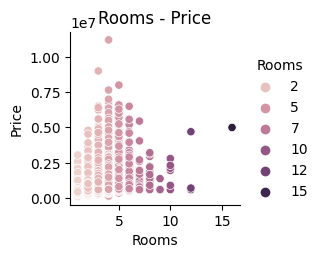

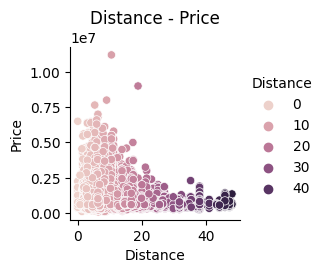

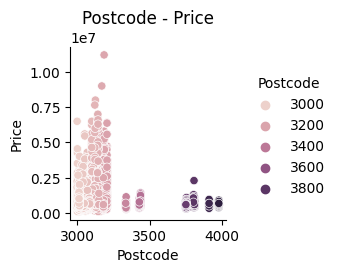

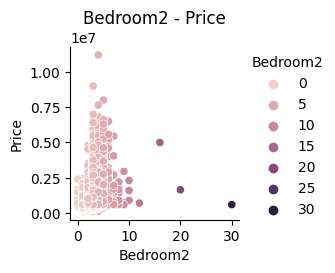

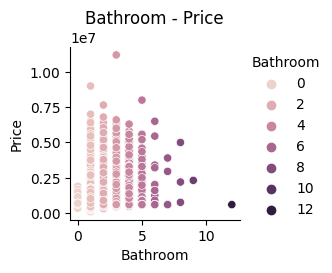

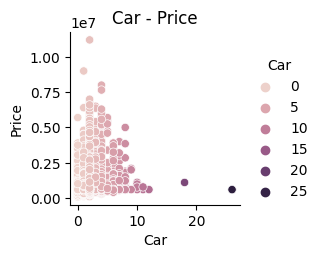

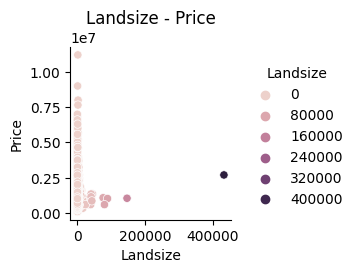

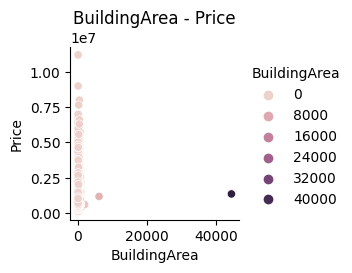

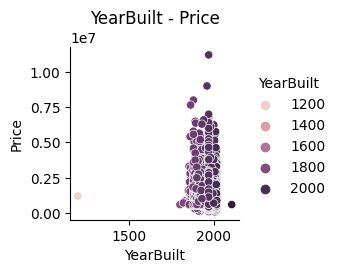

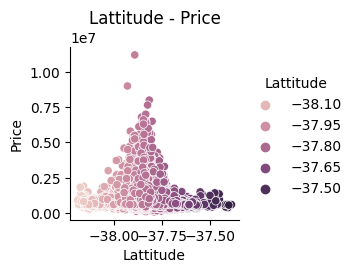

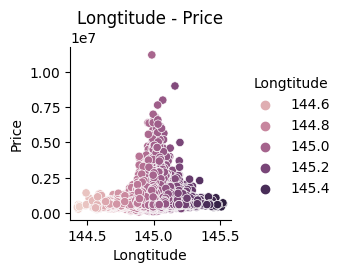

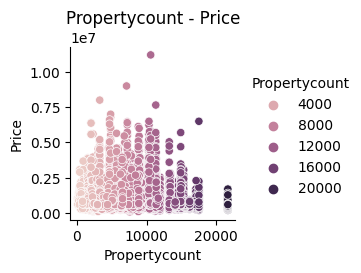

In [33]:
for i in range(len(int_columns)):
  if int_columns[i] != "Price":
    sns.pairplot(data=dataset, x_vars=[int_columns[i]], y_vars=["Price"],  hue=int_columns[i])
    plt.title(f"{int_columns[i]} - Price")
    plt.show()